<a href="https://colab.research.google.com/github/jinnic/ada-project1/blob/main/Supervised_Learning_for_case_pridiction_using_PERM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [280]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!pip install -U scikit-learn==1.4

# **Step 1-1:**  Get Dataset from PERM [2024 PERM data](https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_Disclosure_Data_New_Form_FY2024_Q4.xlsx)


In [281]:
github_data_url = 'https://raw.githubusercontent.com/jinnic/ada-project1/refs/heads/main/Project%201/raw_case_approve_2024_1.csv'

# Read the CSV file directly from the GitHub URL
df = pd.read_csv(github_data_url)
print("Column names and type")
print(df.info())


Column names and type
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22292 entries, 0 to 22291
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CASE_STATUS                     22292 non-null  object 
 1   OCCUPATION_TYPE                 22292 non-null  object 
 2   EMP_NAICS                       22292 non-null  int64  
 3   EMP_NUM_PAYROLL                 22289 non-null  float64
 4   EMP_YEAR_COMMENCED              22292 non-null  int64  
 5   JOB_TITLE                       22226 non-null  object 
 6   JOB_OPP_WAGE_FROM               22226 non-null  object 
 7   JOB_OPP_WAGE_TO                 10898 non-null  object 
 8   JOB_OPP_WAGE_PER                22226 non-null  object 
 9   PRIMARY_WORKSITE_TYPE           22292 non-null  object 
 10  PRIMARY_WORKSITE_CITY           21086 non-null  object 
 11  PRIMARY_WORKSITE_STATE          21086 non-null  object 
 12  PRIMARY_WO

In [282]:
print("Missing data for each column")
print(df.isna().sum())

Missing data for each column
CASE_STATUS                           0
OCCUPATION_TYPE                       0
EMP_NAICS                             0
EMP_NUM_PAYROLL                       3
EMP_YEAR_COMMENCED                    0
JOB_TITLE                            66
JOB_OPP_WAGE_FROM                    66
JOB_OPP_WAGE_TO                   11394
JOB_OPP_WAGE_PER                     66
PRIMARY_WORKSITE_TYPE                 0
PRIMARY_WORKSITE_CITY              1206
PRIMARY_WORKSITE_STATE             1206
PRIMARY_WORKSITE_BLS_AREA          1205
IS_MULTIPLE_LOCATIONS                54
OTHER_REQ_IS_FULLTIME_EMP            54
OTHER_REQ_IS_LIVEIN_HOUSEHOLD        54
OTHER_REQ_JOB_FOREIGN_LANGUAGE        0
dtype: int64


## **Based on [Data dictionary](https://www.dol.gov/sites/dolgov/files/ETA/oflc/pdfs/PERM_New_Form_Record_Layout_FY2025_Q3.pdf):**
* Only keep 'Certified' &
'Denied' for 'CASE_STATUS' as target
* Filter out only yearly wage, fulltime, non livein job


## **Columns to Filter out**

```
'CASE_STATUS' == 'Certified' & 'Denied'
'JOB_OPP_WAGE_PER' == 'Year'
'OTHER_REQ_IS_FULLTIME_EMP' == 'Y'
'OTHER_REQ_IS_LIVEIN_HOUSEHOLD' == 'N'
```



In [283]:
df_filter = df[
    ((df['CASE_STATUS'] == 'Certified') | (df['CASE_STATUS'] == 'Denied')) &
    (df['JOB_OPP_WAGE_PER'] == 'Year') &
    (df['OTHER_REQ_IS_FULLTIME_EMP'] == 'Y') &
    (df['OTHER_REQ_IS_LIVEIN_HOUSEHOLD'] == 'N')
].copy()


print(f"Original row count: {len(df)}")
print(f"Filtered row count: {len(df_filter)}")

print(df_filter.isna().sum())

Original row count: 22292
Filtered row count: 15458
CASE_STATUS                          0
OCCUPATION_TYPE                      0
EMP_NAICS                            0
EMP_NUM_PAYROLL                      0
EMP_YEAR_COMMENCED                   0
JOB_TITLE                            0
JOB_OPP_WAGE_FROM                    0
JOB_OPP_WAGE_TO                   8358
JOB_OPP_WAGE_PER                     0
PRIMARY_WORKSITE_TYPE                0
PRIMARY_WORKSITE_CITY              878
PRIMARY_WORKSITE_STATE             878
PRIMARY_WORKSITE_BLS_AREA          877
IS_MULTIPLE_LOCATIONS                0
OTHER_REQ_IS_FULLTIME_EMP            0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD        0
OTHER_REQ_JOB_FOREIGN_LANGUAGE       0
dtype: int64



# **Step 1-2:** Divide into Training and Testing Sets

In [284]:
from sklearn.model_selection import train_test_split


# 1. Define the final X (Features) and Y (Target)
Y = df_filter['CASE_STATUS']
X = df_filter.drop(columns=['CASE_STATUS'])

# 2. Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(
    X, Y,
    stratify=Y,
    test_size=0.2, # 20% for testing
    random_state=42 # Ensures reproducible
)
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (12366, 16), X_test shape: (3092, 16)
y_train shape: (12366,), y_test shape: (3092,)


# **Step 1-3:** Explore training set

In [285]:
# Show the data type of the training features
print("Training Features (X_train) Information:")
X_train.info()

# Show the summary of the target variable (wage)
print("\nTarget (y_train) Summary:")
print(y_train.describe())

Training Features (X_train) Information:
<class 'pandas.core.frame.DataFrame'>
Index: 12366 entries, 9304 to 7443
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   OCCUPATION_TYPE                 12366 non-null  object 
 1   EMP_NAICS                       12366 non-null  int64  
 2   EMP_NUM_PAYROLL                 12366 non-null  float64
 3   EMP_YEAR_COMMENCED              12366 non-null  int64  
 4   JOB_TITLE                       12366 non-null  object 
 5   JOB_OPP_WAGE_FROM               12366 non-null  object 
 6   JOB_OPP_WAGE_TO                 5684 non-null   object 
 7   JOB_OPP_WAGE_PER                12366 non-null  object 
 8   PRIMARY_WORKSITE_TYPE           12366 non-null  object 
 9   PRIMARY_WORKSITE_CITY           11654 non-null  object 
 10  PRIMARY_WORKSITE_STATE          11654 non-null  object 
 11  PRIMARY_WORKSITE_BLS_AREA       11655 non-null  object 

In [286]:
print(X_train.isna().sum())

OCCUPATION_TYPE                      0
EMP_NAICS                            0
EMP_NUM_PAYROLL                      0
EMP_YEAR_COMMENCED                   0
JOB_TITLE                            0
JOB_OPP_WAGE_FROM                    0
JOB_OPP_WAGE_TO                   6682
JOB_OPP_WAGE_PER                     0
PRIMARY_WORKSITE_TYPE                0
PRIMARY_WORKSITE_CITY              712
PRIMARY_WORKSITE_STATE             712
PRIMARY_WORKSITE_BLS_AREA          711
IS_MULTIPLE_LOCATIONS                0
OTHER_REQ_IS_FULLTIME_EMP            0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD        0
OTHER_REQ_JOB_FOREIGN_LANGUAGE       0
dtype: int64


In [287]:
categorical_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

print("Categorical features:")
print(categorical_features)

print("\nNumerical features:")
print(numerical_features)


Categorical features:
['OCCUPATION_TYPE', 'JOB_TITLE', 'JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO', 'JOB_OPP_WAGE_PER', 'PRIMARY_WORKSITE_TYPE', 'PRIMARY_WORKSITE_CITY', 'PRIMARY_WORKSITE_STATE', 'PRIMARY_WORKSITE_BLS_AREA', 'IS_MULTIPLE_LOCATIONS', 'OTHER_REQ_IS_FULLTIME_EMP', 'OTHER_REQ_IS_LIVEIN_HOUSEHOLD', 'OTHER_REQ_JOB_FOREIGN_LANGUAGE']

Numerical features:
['EMP_NAICS', 'EMP_NUM_PAYROLL', 'EMP_YEAR_COMMENCED']


# **Step 1-4: Data cleaning**

1.  **Impute missing BLS_Area data: I am deciding to drop them rather then adding mode value becuase of broad range**
2.   **Create Avg wage feature with 'JOB_OPP_WAGE_FROM' &	'JOB_OPP_WAGE_TO'**
3. **Simplify NAICS code to first two digit**



## **✅ 1. Fill missing BLS_Area with mode of Train data**

```
'PRIMARY_WORKSITE_BLS_AREA'
```




In [288]:
# 1. Calculate the mode from the training data (X_train)
mode_val_train = X_train['PRIMARY_WORKSITE_BLS_AREA'].mode()[0]

# 2. Impute X_train (Recommended Non-Inplace Assignment)
X_train['PRIMARY_WORKSITE_BLS_AREA'] = X_train['PRIMARY_WORKSITE_BLS_AREA'].fillna(mode_val_train)

# 3. Impute X_test (CRITICAL: Use X_train's mode to prevent data leakage)
X_test['PRIMARY_WORKSITE_BLS_AREA'] = X_test['PRIMARY_WORKSITE_BLS_AREA'].fillna(mode_val_train)

# Note: The original code used X_test's mode for X_test, which is a form of data leakage.
# The correction above uses mode_val_train for both, which is the standard practice.

print("Missing values in PRIMARY_WORKSITE_BLS_AREA have been imputed.")
print(f"X_train missing count: {X_train['PRIMARY_WORKSITE_BLS_AREA'].isna().sum()}")
print(f"X_test missing count: {X_test['PRIMARY_WORKSITE_BLS_AREA'].isna().sum()}")

Missing values in PRIMARY_WORKSITE_BLS_AREA have been imputed.
X_train missing count: 0
X_test missing count: 0


## **✅ 2. Create Average wage colum**

```
'JOB_AVG_WAGE' is not empty # calculated with 'JOB_OPP_WAGE_FROM' &
'JOB_OPP_WAGE_TO'
```




In [289]:
# Convert relevant columns to numeric, stripping non-numeric characters
for col in ['JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO']:
    X_train[col] = X_train[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')

# If 'JOB_OPP_WAGE_TO' is empty, replace it with 'JOB_OPP_WAGE_FROM'
X_train['JOB_OPP_WAGE_TO'] = X_train['JOB_OPP_WAGE_TO'].fillna(X_train['JOB_OPP_WAGE_FROM'])
# Create 'JOB_AVG_WAGE' by averaging the two columns
X_train['JOB_AVG_WAGE'] = (X_train['JOB_OPP_WAGE_FROM'] + X_train['JOB_OPP_WAGE_TO']) / 2

# Drop null row of 'JOB_AVG_WAGE'
print(f"Original row count: {len(X_train)}")

print(X_train.isna().sum())

# Check calculation
print(X_train['JOB_AVG_WAGE'].dtype)
display(X_train[['JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO', 'JOB_AVG_WAGE']].head(10))




Original row count: 12366
OCCUPATION_TYPE                     0
EMP_NAICS                           0
EMP_NUM_PAYROLL                     0
EMP_YEAR_COMMENCED                  0
JOB_TITLE                           0
JOB_OPP_WAGE_FROM                   0
JOB_OPP_WAGE_TO                     0
JOB_OPP_WAGE_PER                    0
PRIMARY_WORKSITE_TYPE               0
PRIMARY_WORKSITE_CITY             712
PRIMARY_WORKSITE_STATE            712
PRIMARY_WORKSITE_BLS_AREA           0
IS_MULTIPLE_LOCATIONS               0
OTHER_REQ_IS_FULLTIME_EMP           0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD       0
OTHER_REQ_JOB_FOREIGN_LANGUAGE      0
JOB_AVG_WAGE                        0
dtype: int64
float64


,JOB_OPP_WAGE_FROM,JOB_OPP_WAGE_TO,JOB_AVG_WAGE
9304,33904.0,33904.0,33904.0
12687,34029.0,45760.0,39894.5
15837,35880.0,35880.0,35880.0
13680,120058.0,142300.0,131179.0
10665,111538.0,153200.0,132369.0
5800,53040.0,53040.0,53040.0
21394,30160.0,30160.0,30160.0
13898,27144.0,27144.0,27144.0
15349,26749.0,26749.0,26749.0
18251,127920.0,237600.0,182760.0


### **🔁 Do the same to Test set**

In [290]:
# Convert relevant columns to numeric, stripping non-numeric characters
for col in ['JOB_OPP_WAGE_FROM', 'JOB_OPP_WAGE_TO']:
    X_test[col] = X_test[col].astype(str).str.replace('$', '', regex=False).str.replace(',', '', regex=False)
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')

# If 'JOB_OPP_WAGE_TO' is empty, replace it with 'JOB_OPP_WAGE_FROM'
X_test['JOB_OPP_WAGE_TO'] = X_test['JOB_OPP_WAGE_TO'].fillna(X_test['JOB_OPP_WAGE_FROM'])
# Create 'JOB_AVG_WAGE' by averaging the two columns
X_test['JOB_AVG_WAGE'] = (X_test['JOB_OPP_WAGE_FROM'] + X_test['JOB_OPP_WAGE_TO']) / 2


In [291]:
print("Missing values in X_train after imputation:")
print(X_train[numerical_cols_to_impute + categorical_cols_to_impute].isnull().sum())

print("\nMissing values in X_test after imputation:")
print(X_test[numerical_cols_to_impute + categorical_cols_to_impute].isnull().sum())

Missing values in X_train after imputation:
EMP_NAICS                           0
EMP_NUM_PAYROLL                     0
EMP_YEAR_COMMENCED                  0
OCCUPATION_TYPE                     0
JOB_TITLE                           0
JOB_OPP_WAGE_FROM                   0
JOB_OPP_WAGE_TO                     0
JOB_OPP_WAGE_PER                    0
PRIMARY_WORKSITE_TYPE               0
PRIMARY_WORKSITE_CITY             712
PRIMARY_WORKSITE_STATE            712
PRIMARY_WORKSITE_BLS_AREA           0
IS_MULTIPLE_LOCATIONS               0
OTHER_REQ_IS_FULLTIME_EMP           0
OTHER_REQ_IS_LIVEIN_HOUSEHOLD       0
OTHER_REQ_JOB_FOREIGN_LANGUAGE      0
dtype: int64

Missing values in X_test after imputation:
EMP_NAICS                           0
EMP_NUM_PAYROLL                     0
EMP_YEAR_COMMENCED                  0
OCCUPATION_TYPE                     0
JOB_TITLE                           0
JOB_OPP_WAGE_FROM                   0
JOB_OPP_WAGE_TO                     0
JOB_OPP_WAGE_PER         

In [292]:
df_clean.dropna(subset=['JOB_AVG_WAGE','PRIMARY_WORKSITE_BLS_AREA'], inplace=True)
print(f"Clean row count: {len(df_clean)}")

Clean row count: 11655


##✅ **3-1. Create join table for NAICS with Industry name**

In [293]:
naics_data = """
11	Agriculture, Forestry, Fishing and Hunting
21	Mining, Quarrying, and Oil and Gas Extraction
22	Utilities
23	Construction
31-33	Manufacturing
42	Wholesale Trade
44-45	Retail Trade
48-49	Transportation and Warehousing
51	Information
52	Finance and Insurance
53	Real Estate and Rental and Leasing
54	Professional, Scientific, and Technical Services
55	Management of Companies and Enterprises
56	Administrative and Support and Waste Management and Remediation Services
61	Educational Services
62	Health Care and Social Assistance
71	Arts, Entertainment, and Recreation
72	Accommodation and Food Services
81	Other Services (except Public Administration)
92	Public Administration
"""

naics_mapping = {}
for line in naics_data.strip().split('\n'):
    parts = line.split('\t')
    code_str = parts[0]
    sector_name = parts[1]

    if '-' in code_str:
        start, end = map(int, code_str.split('-'))
        for i in range(start, end + 1):
            naics_mapping[str(i)] = sector_name
    else:
        naics_mapping[code_str] = sector_name

# Create a DataFrame from the mapping
naics_df = pd.DataFrame(naics_mapping.items(), columns=['NAICS_CODE', 'NAICS_DESCRIPTION'])

print("NAICS CODE Mapping DataFrame:")
display(naics_df.head(10))
print(f"Total unique NAICS CODES: {len(naics_df)}")
print(f"Total unique NAICS DESCRIPTIONS: {naics_df['NAICS_DESCRIPTION'].nunique()}")


NAICS CODE Mapping DataFrame:


,NAICS_CODE,NAICS_DESCRIPTION
0,11,"Agriculture, Forestry, Fishing and Hunting"
1,21,"Mining, Quarrying, and Oil and Gas Extraction"
2,22,Utilities
3,23,Construction
4,31,Manufacturing
5,32,Manufacturing
6,33,Manufacturing
7,42,Wholesale Trade
8,44,Retail Trade
9,45,Retail Trade


Total unique NAICS CODES: 24
Total unique NAICS DESCRIPTIONS: 20


## **✅ 3-2. Simplyfy NAICS - North American Industry Classification System**

Keep first two digit for simpler category of industry

In [294]:
# Convert the EMP_NAICS column to a string
# slice to keep first two digit
X_train['NAICS_CODE'] = X_train['EMP_NAICS'].astype(str).str[0:2]

# Check its unique values and count to make sure it's matching join table
print(sorted(X_train['NAICS_CODE'].unique()))
print(f"Total unique NAICS codes mapped: {len(X_train['NAICS_CODE'].unique())}")

display(X_train[['EMP_NAICS', 'NAICS_CODE']].head())

['11', '21', '22', '23', '31', '32', '33', '42', '44', '45', '48', '49', '51', '52', '53', '54', '55', '56', '61', '62', '71', '72', '81', '92']
Total unique NAICS codes mapped: 24


,EMP_NAICS,NAICS_CODE
9304,56173,56
12687,722511,72
15837,336111,33
13680,515210,51
10665,51821,51


In [295]:
# Merge X_train with naics_df to add the NAICS_DESCRIPTION
X_train = pd.merge(
    X_train,
    naics_df,
    left_on='NAICS_CODE',
    right_on='NAICS_CODE', # Use NAICS_CODE from naics_df
    how='left'
)

# Display the first few rows to show the new 'NAICS_DESCRIPTION' column
display(X_train[['EMP_NAICS', 'NAICS_CODE', 'NAICS_DESCRIPTION']].head())
print(f"Total unique NAICS DESCRIPTIONS: {X_train['NAICS_DESCRIPTION'].nunique()}")

# Check for any missing values in the new 'NAICS_DESCRIPTION' column
print(f"Missing values in NAICS_DESCRIPTION in X_train after merge: {X_train['NAICS_DESCRIPTION'].isnull().sum()}")

,EMP_NAICS,NAICS_CODE,NAICS_DESCRIPTION
0,56173,56,Administrative and Support and Waste Managemen...
1,722511,72,Accommodation and Food Services
2,336111,33,Manufacturing
3,515210,51,Information
4,51821,51,Information


Total unique NAICS DESCRIPTIONS: 20
Missing values in NAICS_DESCRIPTION in X_train after merge: 0


### **🔁 Do the same to Test set**

In [296]:
# Convert the EMP_NAICS column to a string
# slice to keep first two digit
X_test['NAICS_CODE'] = X_test['EMP_NAICS'].astype(str).str[0:2]
# Merge X_test with naics_df to add the NAICS_DESCRIPTION
X_test = pd.merge(
    X_test,
    naics_df,
    left_on='NAICS_CODE',
    right_on='NAICS_CODE', # Use NAICS_CODE from naics_df
    how='left'
)

# Check for any missing values in the new 'NAICS_DESCRIPTION' column
print(f"Missing values in NAICS_DESCRIPTION in X_test after merge: {X_test['NAICS_DESCRIPTION'].isnull().sum()}")

Missing values in NAICS_DESCRIPTION in X_test after merge: 0


## **✅4. Clean Job title**
* Merge jr and junior, sr and senior

In [297]:
# Convert to lowercase and remove leading/trailing spaces
X_train['JOB_TITLE_CLEAN'] = X_train['JOB_TITLE'].str.lower().str.strip()
print(f"Unique Titles before cleaning: {X_train['JOB_TITLE'].nunique()}")

# remove common seniority prefixes/suffixes and numbers from title
X_train['JOB_TITLE_CLEAN'] = (
    X_train['JOB_TITLE_CLEAN']
    .str.replace(r'\b(sr|senior)\b', 'sr.', regex=True)
    .str.replace(r'\b(jr|junior)\b', 'jr.', regex=True)
    .str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation (e.g., commas, dashes)
    .str.replace(r'\s+', ' ', regex=True)     # Collapse multiple spaces into one
    .str.strip()
)



print(f"Unique Titles after cleaning: {X_train['JOB_TITLE_CLEAN'].nunique()}")

Unique Titles before cleaning: 4676
Unique Titles after cleaning: 4127


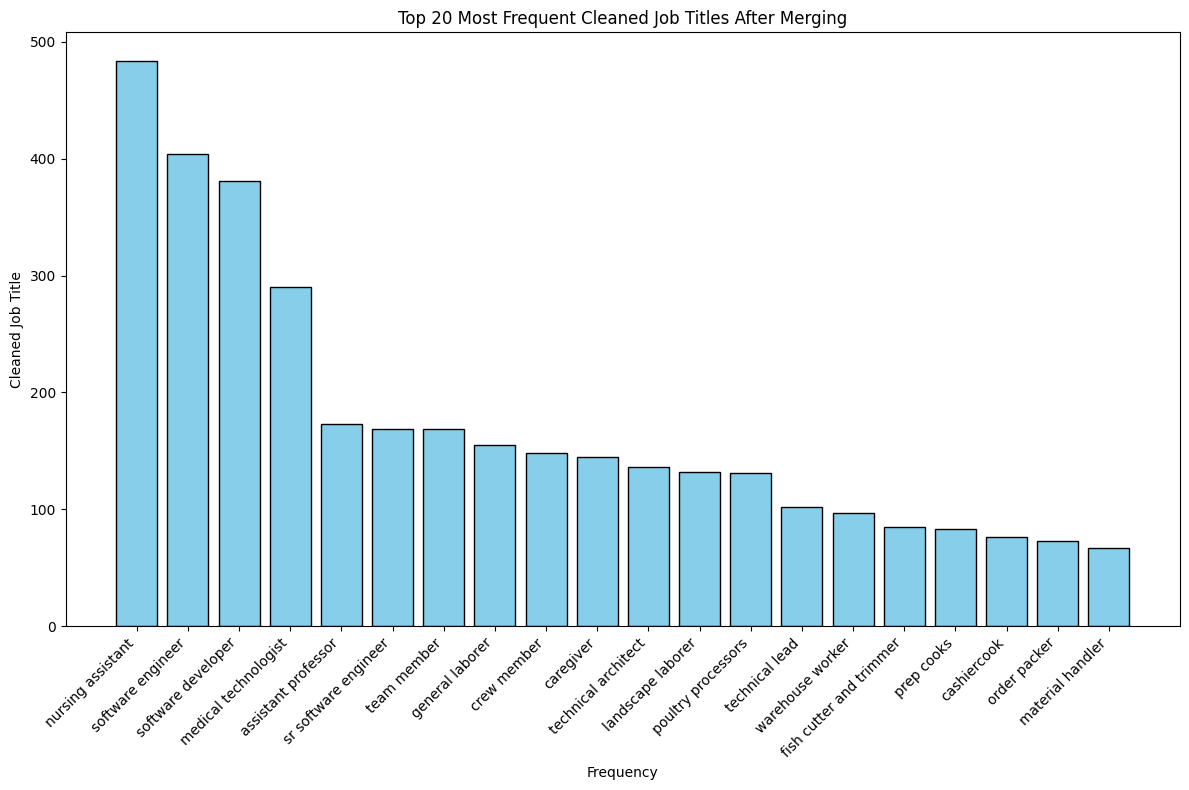

In [298]:
# Get the top 20 cleaned job titles
top_n = 20
top_job_titles = X_train['JOB_TITLE_CLEAN'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_job_titles.index, top_job_titles.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Cleaned Job Titles After Merging')
plt.xlabel('Frequency')
plt.ylabel('Cleaned Job Title')
plt.xticks(rotation=45, ha='right') # Rotate labels
plt.tight_layout()
plt.show()

### **🔁 Do the same to Test set**

In [299]:
# Convert to lowercase and remove leading/trailing spaces
X_test['JOB_TITLE_CLEAN'] = X_test['JOB_TITLE'].str.lower().str.strip()

# remove common seniority prefixes/suffixes and numbers from title
X_test['JOB_TITLE_CLEAN'] = (
    X_test['JOB_TITLE_CLEAN']
    .str.replace(r'\b(sr|senior)\b', 'sr.', regex=True)
    .str.replace(r'\b(jr|junior)\b', 'jr.', regex=True)
    .str.replace(r'[^\w\s]', '', regex=True) # Remove punctuation (e.g., commas, dashes)
    .str.replace(r'\s+', ' ', regex=True)     # Collapse multiple spaces into one
    .str.strip()
)


## ✅ **5. Company Size & Tenure**
Define the boundaries for company size categories and calculate the age of the company based on the year the dataset was published (Fiscal Year 2024)



### **5-1.Thresholds common in business/economic:**

* Small: < 50 employees
* Mid: 50 to 1,000 employees
* Large: > 1,000 employees



```
bins = [0, 50, 1000, np.inf]
labels = ['Small', 'Mid', 'Large']
```

In [300]:
# Check for values less than or equal to 0
print(f"Count of EMP_NUM_PAYROLL <= 0: {(X_train['EMP_NUM_PAYROLL'] <=0).sum()}")

# Check for non-finite values (inf, -inf) which are not normal NaNs
print(f"Count of non-finite values: {np.sum(~np.isfinite(X_train['EMP_NUM_PAYROLL']))}")

Count of EMP_NUM_PAYROLL <= 0: 61
Count of non-finite values: 0


In [301]:
bins = [-1, 50, 1000, np.inf] # to include 0 I put -1
labels = ['Small', 'Mid', 'Large']

X_train['COMPANY_SIZE_CAT'] = pd.cut(
    X_train['EMP_NUM_PAYROLL'],
    bins=bins,
    labels=labels
)

print("\nCompany Size Distribution:")
print(X_train['COMPANY_SIZE_CAT'].value_counts(dropna=False))


X_test['COMPANY_SIZE_CAT'] = pd.cut(
    X_test['EMP_NUM_PAYROLL'],
    bins=bins,
    labels=labels
)



Company Size Distribution:
COMPANY_SIZE_CAT
Mid      5240
Small    3585
Large    3541
Name: count, dtype: int64


### **5-2. Create 'COMPANY_AGE' column**

In [302]:
REFERENCE_YEAR = 2024

# Convert 0 in EMP_YEAR_COMMENCED to NaN for both DataFrames
X_train['EMP_YEAR_COMMENCED'] = X_train['EMP_YEAR_COMMENCED'].replace(0, np.nan)
X_test['EMP_YEAR_COMMENCED'] = X_test['EMP_YEAR_COMMENCED'].replace(0, np.nan)

# Calculate company age in years
X_train['COMPANY_AGE'] = REFERENCE_YEAR - X_train['EMP_YEAR_COMMENCED']
X_test['COMPANY_AGE'] = REFERENCE_YEAR - X_test['EMP_YEAR_COMMENCED']

# Calculate the median of COMPANY_AGE from X_train
median_age_train = X_train['COMPANY_AGE'].median()

# 4. Impute NaNs in COMPANY_AGE for both X_train and X_test using the median from X_train
X_train['COMPANY_AGE'] = X_train['COMPANY_AGE'].fillna(median_age_train)
X_test['COMPANY_AGE'] = X_test['COMPANY_AGE'].fillna(median_age_train)

print("\nCompany Age (Length of Establishment) Statistics:")
print(X_train['COMPANY_AGE'].describe())


Company Age (Length of Establishment) Statistics:
count    12366.000000
mean        37.269772
std         41.480468
min          1.000000
25%         12.000000
50%         23.000000
75%         47.000000
max        374.000000
Name: COMPANY_AGE, dtype: float64


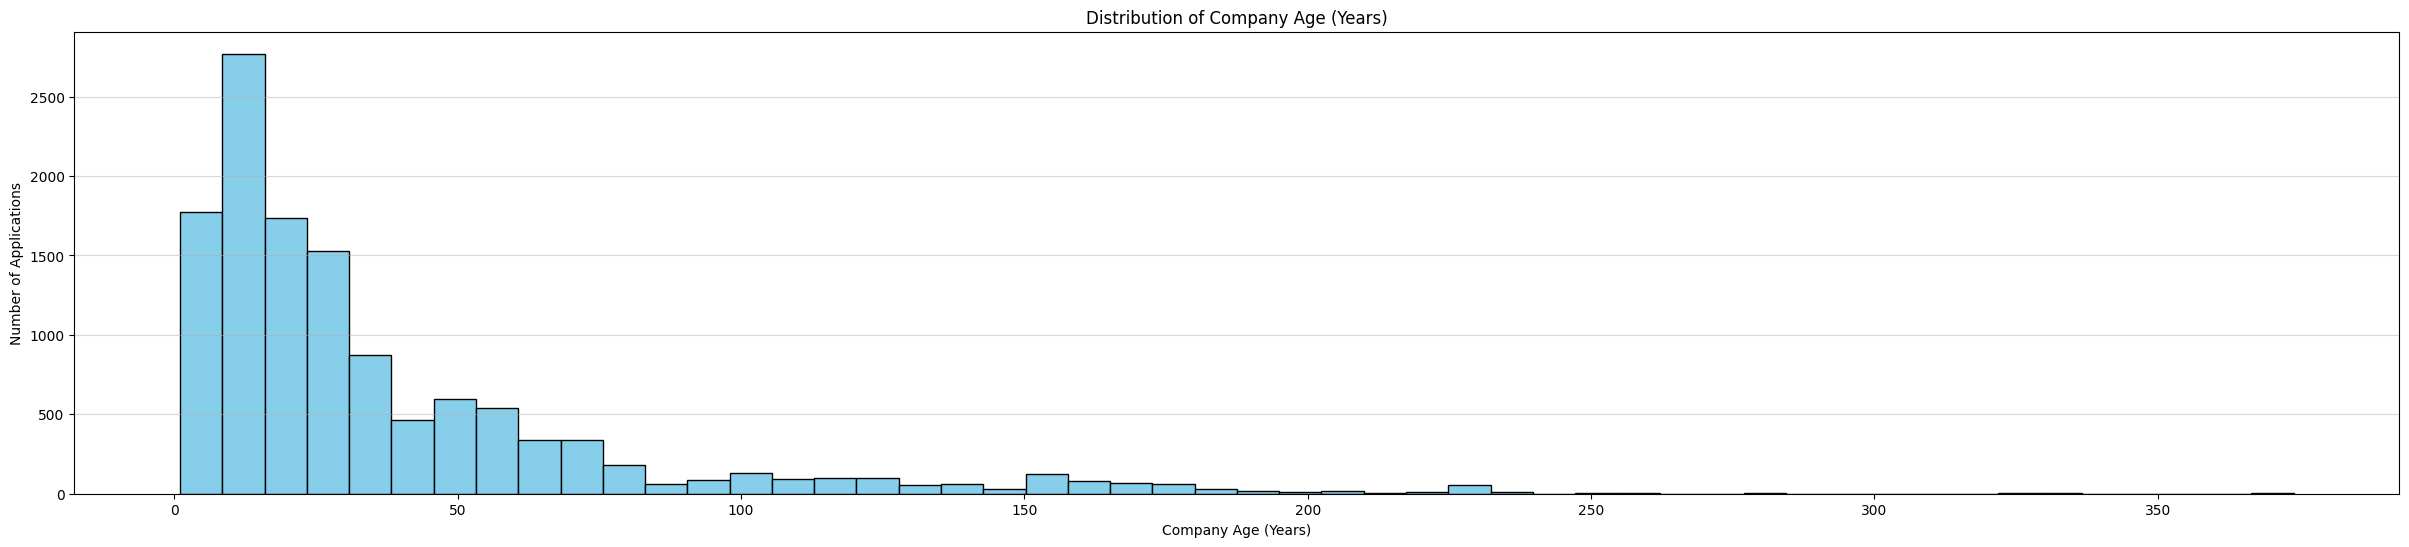

In [303]:
import matplotlib.pyplot as plt

# 1. Set the size of the plot
plt.figure(figsize=(30, 6))

# 2. Create the histogram
plt.hist(X_train['COMPANY_AGE'], bins=50, edgecolor='black', color='skyblue')

# 3. Add labels and a title for clarity
plt.title('Distribution of Company Age (Years)')
plt.xlabel('Company Age (Years)')
plt.ylabel('Number of Applications')
plt.grid(axis='y', alpha=0.5)

# 4. Show the plot
plt.show()

### **5-3. Thresholds for company age based on distribution:**

* Young: < 10 years old
* Established: 10 to 25 years old
* Mature: 25 to 45 years old
* Legacy: > 45 years old



```
bins = [0, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']
```


In [304]:
bins = [-1, 10, 25, 45, np.inf]
labels = ['Young', 'Established', 'Mature', 'Legacy']

# Create the new categorical column
X_train['COMPANY_AGE_CAT'] = pd.cut(
    X_train['COMPANY_AGE'],
    bins=bins,
    labels=labels
)

X_test['COMPANY_AGE_CAT'] = pd.cut(
    X_test['COMPANY_AGE'],
    bins=bins,
    labels=labels
)

# Display the new distribution
print("\nCompany Age Category Distribution (Custom Bins):")
print(X_train['COMPANY_AGE_CAT'].value_counts())


Company Age Category Distribution (Custom Bins):
COMPANY_AGE_CAT
Established    4290
Legacy         3225
Young          2458
Mature         2393
Name: count, dtype: int64


## ✅ **6. Visualize BLS area distribution**


BLS Area categories (X_train): 403


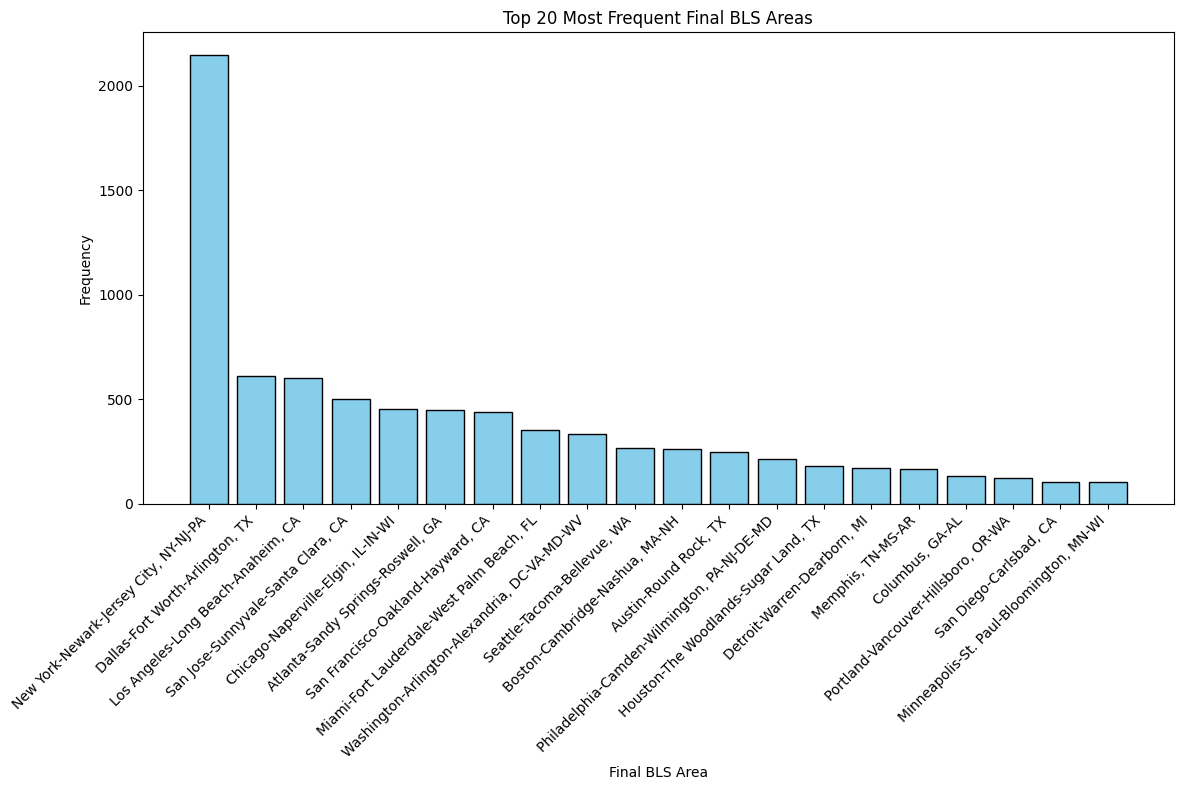

In [305]:
print(f"BLS Area categories (X_train): {X_train['PRIMARY_WORKSITE_BLS_AREA'].nunique()}")

# Get the top 20 most frequent final BLS areas
top_n = 20
top_bls_areas = X_train['PRIMARY_WORKSITE_BLS_AREA'].value_counts().nlargest(top_n)

plt.figure(figsize=(12, 8))
plt.bar(top_bls_areas.index, top_bls_areas.values, edgecolor='black', color='skyblue')
plt.title(f'Top {top_n} Most Frequent Final BLS Areas')
plt.xlabel('Final BLS Area')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ✅ **7. Drop unneccesry columns**
Columns that are filtered or used to create feature.

* 'JOB_OPP_WAGE_TO' & 'JOB_OPP_WAGE_FROM'
* 'JOB_OPP_WAGE_PER' == 'Year'
* 'OTHER_REQ_IS_FULLTIME_EMP' == 'Y'
* 'OTHER_REQ_IS_LIVEIN_HOUSEHOLD' == 'N'



In [306]:
columns_to_drop = [
    'JOB_OPP_WAGE_FROM',
    'JOB_OPP_WAGE_TO',
    'EMP_NAICS',
    'NAICS_CODE',
    'EMP_YEAR_COMMENCED',
    'JOB_TITLE',
    'JOB_TITLE_CLEAN',  #Dropping due to high unique values
    'JOB_OPP_WAGE_PER',
    'PRIMARY_WORKSITE_TYPE',  # Not used
    'PRIMARY_WORKSITE_CITY',  # Redundant/Not used
    'PRIMARY_WORKSITE_STATE', # Redundant/Not used
    'OCCUPATION_TYPE',  # Not used
    'IS_MULTIPLE_LOCATIONS',  # Not used
    'OTHER_REQ_IS_FULLTIME_EMP', # Constant value after filtering
    'OTHER_REQ_IS_LIVEIN_HOUSEHOLD', # Constant value after filtering
    'OTHER_REQ_JOB_FOREIGN_LANGUAGE' # Not used
]
print("Columns dropped successfully.")
print(f"Clean row count: {len(X_train)}")
X_train = X_train.drop(columns=columns_to_drop)
print(f"Final row count: {len(X_train)}")

display(X_train.head())
print("Missing values (NA count) per column:")
print(X_train.isna().sum())

X_test = X_test.drop(columns=columns_to_drop)


Columns dropped successfully.
Clean row count: 12366
Final row count: 12366


,EMP_NUM_PAYROLL,PRIMARY_WORKSITE_BLS_AREA,JOB_AVG_WAGE,NAICS_DESCRIPTION,COMPANY_SIZE_CAT,COMPANY_AGE,COMPANY_AGE_CAT
0,34.0,"Dallas-Fort Worth-Arlington, TX",33904.0,Administrative and Support and Waste Managemen...,Small,40.0,Mature
1,10.0,Western Washington nonmetropolitan area,39894.5,Accommodation and Food Services,Small,38.0,Mature
2,343.0,"Reading, PA",35880.0,Manufacturing,Mid,72.0,Legacy
3,6483.0,"Charlotte-Concord-Gastonia, NC-SC",131179.0,Information,Large,31.0,Mature
4,1052.0,"Atlanta-Sandy Springs-Roswell, GA",132369.0,Information,Large,63.0,Legacy


Missing values (NA count) per column:
EMP_NUM_PAYROLL              0
PRIMARY_WORKSITE_BLS_AREA    0
JOB_AVG_WAGE                 0
NAICS_DESCRIPTION            0
COMPANY_SIZE_CAT             0
COMPANY_AGE                  0
COMPANY_AGE_CAT              0
dtype: int64


# **Step 2: Prepare Features**

1. **OrdinalEncoder: 'COMPANY_SIZE_CAT', 'COMPANY_AGE_CAT'**
2. **StandardScaler(numerical data):'JOB_AVG_WAGE', 'COMPANY_AGE'**
3. **OneHotEncode(categorical data): 'PRIMARY_WORKSITE_BLS_AREA', 'NAICS_DESCRIPTION'**



In [307]:
##OrdinalEncoder

from sklearn.preprocessing import OrdinalEncoder

# Define the order of the categories
size_categories = ['Small', 'Mid', 'Large']
age_categories = ['Young', 'Established', 'Mature', 'Legacy']

# Create the encoder, specifying the categories for each column
ordinal_encoder = OrdinalEncoder(categories=[size_categories, age_categories],
                                 handle_unknown='error', # Ensures safety if unexpected value appears
                                 dtype=np.int64)

# Define the columns to be transformed
ordinal_cols = ['COMPANY_SIZE_CAT', 'COMPANY_AGE_CAT']

In [308]:
# Fit the encoder only on X_train
ordinal_encoder.fit(X_train[ordinal_cols])

# Apply the transformation to both X_train and X_test
X_train[ordinal_cols] = ordinal_encoder.transform(X_train[ordinal_cols])
X_test[ordinal_cols] = ordinal_encoder.transform(X_test[ordinal_cols])

# Check the results
print("Ordinal Encoding .")
print(X_train[ordinal_cols].head())
print("\nData Types:")
print(X_train[ordinal_cols].dtypes)

Ordinal Encoding .
   COMPANY_SIZE_CAT  COMPANY_AGE_CAT
0                 0                2
1                 0                2
2                 1                3
3                 2                2
4                 2                3

Data Types:
COMPANY_SIZE_CAT    int64
COMPANY_AGE_CAT     int64
dtype: object


In [309]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Features to be scaled (numerical with wide range)
numerical_cols = ['JOB_AVG_WAGE', 'COMPANY_AGE']

# Features for One-Hot Encoding (no order)
# 'PRIMARY_WORKSITE_BLS_AREA' has 403 unique values; 'NAICS_DESCRIPTION' has 20 unique values.
onehot_cols = ['PRIMARY_WORKSITE_BLS_AREA', 'NAICS_DESCRIPTION']


In [310]:
## Scaler for numerical columns
numerical_transformer = StandardScaler()

## One-Hot Encoder for categorical columns
# handle_unknown='ignore' ensures that if the test set has a category not seen
# in the train set, it just ignores it (sets all new binary columns to 0) instead of throwing an error.
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [311]:
# Create the ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, onehot_cols)
    ],
    remainder='passthrough'
)

In [312]:
# Fit the transformer ONLY on the training data (X_train)
preprocessor.fit(X_train)

# Transform both X_train and X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Convert the resulting NumPy arrays back to DataFrames for easier viewing and model use
feature_names = preprocessor.get_feature_names_out()
X_train_final = pd.DataFrame(X_train_processed, columns=feature_names)
X_test_final = pd.DataFrame(X_test_processed, columns=feature_names)

print(f"Original X_train shape: {X_train.shape}")
print(f"Processed X_train_final shape: {X_train_final.shape}")

Original X_train shape: (12366, 7)
Processed X_train_final shape: (12366, 428)


# **Step 3: Examine your target attribute**

Distribution of Target Attribute (CASE_STATUS) in y_train:
             Count  Proportion (%)
CASE_STATUS                       
Certified    12262           99.16
Denied         104            0.84


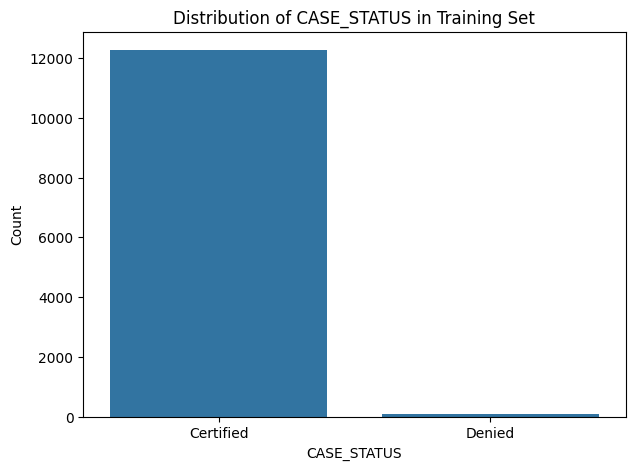

In [313]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Check the count and proportion of each class in the training set
print("Distribution of Target Attribute (CASE_STATUS) in y_train:")
case_counts = y_train.value_counts()
case_proportions = y_train.value_counts(normalize=True) * 100

# Combine the results into a single table for clarity
distribution_df = pd.DataFrame({
    'Count': case_counts,
    'Proportion (%)': case_proportions.round(2)
})
print(distribution_df)

# 2. Plot the distribution (Bar plot is best for categorical data)
plt.figure(figsize=(7, 5))
sns.countplot(x=y_train, order=y_train.value_counts().index)
plt.title('Distribution of CASE_STATUS in Training Set')
plt.xlabel('CASE_STATUS')
plt.ylabel('Count')
plt.show()

# Step 4: Training Model

## **Part 1: Logistic Regression**

In [314]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# Define the model
log_reg = LogisticRegression(random_state=42, max_iter=1000) #max_iter had to increase to 1000

# Cross-validation
# StratifiedKFold ensures each fold has the same proportion of Certified/Denied cases.
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric. Since the data is imbalanced, I will use the F1-score
f1_scorer = make_scorer(f1_score, average='binary', pos_label='Certified')

# Cross-Validation (on X_train_final and y_train)
cv_scores_f1 = cross_val_score(log_reg, X_train_final, y_train, cv=cross_validation, scoring=f1_scorer, n_jobs=-1)

print("Logistic Regression Cross-Validation")
print("--------------------------------------------------")

print(f"Individual F1-scores for 5 folds: {np.round(cv_scores_f1, 4)}")
print(f"Mean Cross-Validated F1-score: {np.mean(cv_scores_f1):.4f}")

Logistic Regression Cross-Validation
--------------------------------------------------
Individual F1-scores for 5 folds: [0.9957 0.9959 0.9957 0.9957 0.9957]
Mean Cross-Validated F1-score: 0.9958


Logistic Regression Model Predictions
---------------------------------------------------------
Classification Report on Test Set:
              precision    recall  f1-score   support

   Certified       0.99      1.00      1.00      3066
      Denied       0.00      0.00      0.00        26

    accuracy                           0.99      3092
   macro avg       0.50      0.50      0.50      3092
weighted avg       0.98      0.99      0.99      3092



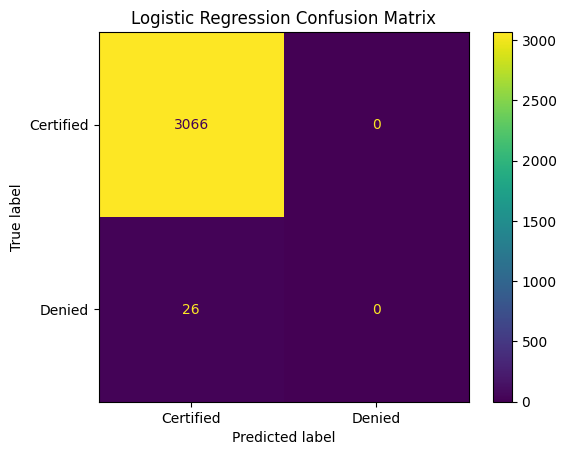

In [315]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fit the final model on the entire training data
log_reg.fit(X_train_final, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test_final)

print("Logistic Regression Model Predictions")
print("---------------------------------------------------------")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_log_reg, zero_division=0))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_log_reg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot()
plt.title('Logistic Regression Confusion Matrix')
plt.show()

## 🔎 **Logistic Regression Performance Analysis**

It clearly shows that ***Logistic Regression model is failing*** to identify the minority class ('Denied') entirely.

###1. **Problem: Failing the Minority**
* **Recall for 'Denied'** (0.00): It means that out of the 26 applications that were actually Denied, the model didn't identified any of them.



* **Precision for 'Denied'** (0.00): This is also 0.00 because the model never predicted any application as 'Denied'. If it never makes a positive prediction, both precision and recall on that class are zero.
* **Accuracy** (0.99): The model is 99% accurate only because it correctly predicts the skewed majority of cases as 'Certified' (3066 out of 3092 total cases). It's essentially acting as a dummy classifier that always predicts the majority class.

###2. **Confusion Matrix**
> The matrix shows the model predicted 3092 Certified and 0 Denied applications. The chart shows almost all the values concentrated in the top-left yellow cell.
* **True Positives** (Certified/Certified): 3066
* **False Negatives** (Certified/Denied): 26 - They are 26 actual Denied cases that the model labeled as Certified.
* **True Negatives** (Denied/Denied): 0
* **False Positives** (Denied/Certified): 0


## Tuned Model


In [316]:
from sklearn.model_selection import GridSearchCV

# Base model with class balancing
log_reg_base = LogisticRegression(random_state=42, max_iter=2000, class_weight='balanced')

# Parameters grid to search
param_grid_logreg = {
    'C': [0.1, 1.0, 10.0],  # smaller C means stronger regularization
    'solver': ['liblinear', 'lbfgs']  # solver is the algorithm used to minimize the loss function
}

# Scoring metric for the minority class ('Denied')
recall_denied_scorer = make_scorer(recall_score, pos_label='Denied')

# Run the Grid Search
grid_search_logreg = GridSearchCV(
    estimator=log_reg_base,
    param_grid=param_grid_logreg,
    scoring=recall_denied_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search_logreg.fit(X_train_final, y_train)

# Best parameters
best_log_reg_clf = grid_search_logreg.best_estimator_
print("Logistic Regression Grid Search")
print(f"Best Parameters: {grid_search_logreg.best_params_}")
print(f"Best cross-validated Denied Recall Score: {grid_search_logreg.best_score_:.4f}")

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Logistic Regression Grid Search
Best Parameters: {'C': 0.1, 'solver': 'liblinear'}
Best cross-validated Denied Recall Score: 0.5854


Tuned Logistic Regression Model Predictions
---------------------------------------------------------------
Classification Report on Test Set (Tuned Log Reg):
              precision    recall  f1-score   support

   Certified       0.99      0.82      0.90      3066
      Denied       0.02      0.38      0.03        26

    accuracy                           0.81      3092
   macro avg       0.51      0.60      0.47      3092
weighted avg       0.99      0.81      0.89      3092



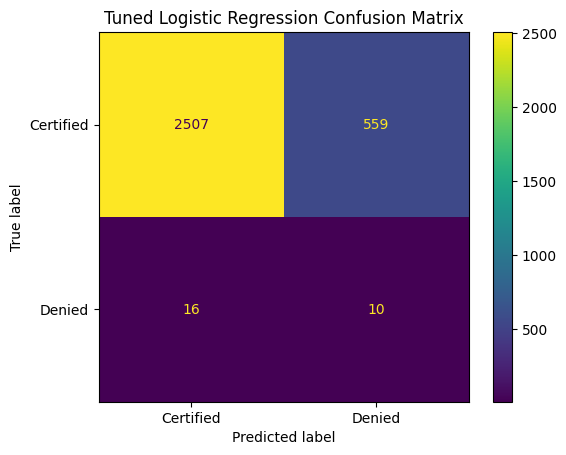

In [317]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# The best model (best_log_reg_clf) is automatically retrieved from the grid search.
best_log_reg_clf = grid_search_logreg.best_estimator_

# Fit the best model on the entire training data - uses the optimal C, solver, class_weight='balanced'.
best_log_reg_clf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_tuned_logreg = best_log_reg_clf.predict(X_test_final)

print("Tuned Logistic Regression Model Predictions")
print("---------------------------------------------------------------")

# Classification Report (required metrics for the rubric)
print("Classification Report on Test Set (Tuned Log Reg):")
print(classification_report(y_test, y_pred_tuned_logreg, zero_division=0))

# Confusion Matrix for visualization
cm_tuned_logreg = confusion_matrix(y_test, y_pred_tuned_logreg)
disp_tuned_logreg = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_logreg, display_labels=best_log_reg_clf.classes_)
disp_tuned_logreg.plot()
plt.title('Tuned Logistic Regression Confusion Matrix')
plt.show()

## **🔎 (After Grid Search)Tuned Logistic Regression Performance Analysis**

The application of `class_weight='balanced'` and tuning of the regularization parameter (C) via Grid Search forced the model to prioritize the 'Denied' class, resulting in significant changes to its predictions.
###**The Gain: Identifying the Minority Class**
* The model is no longer failing the minority class, but it is doing so at a steep cost to Precision.
* **Recall for 'Denied'** (0.38): This is the main win - out of the 26 applications that were actually Denied, the model correctly identified about 10 of them. Which is a massive improvement from the 0.00 Recall of the default model.

* **Precision for 'Denied'** (0.02): The model predicts an application will be Denied, it is only correct 2% of the time. The other 98% of these predictions were actually 'Certified' cases (False Positives).
* **Accuracy** (0.81): The overall accuracy dropped from 0.99 to 0.81 because the model is now intentionally misclassifying many 'Certified' cases as 'Denied' to avoid missing the actual denials.


## **Part 2: Random Forest**

In [318]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score

# model with class_weight='balanced', n_estimators=100
rf_clf = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)

# Cross-validation set
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric
f1_scorer = make_scorer(f1_score, average='binary', pos_label='Certified')

# Perform Cross-Validation (on X_train_final and y_train)
cv_scores_rf_f1 = cross_val_score(rf_clf, X_train_final, y_train, cv=cross_validation, scoring=f1_scorer, n_jobs=-1)

print("Random Forest Cross-Validation with Class Weighting")
print("--------------------------------------------------")

print(f"Individual F1-scores for 5 folds: {np.round(cv_scores_rf_f1, 4)}")
print(f"Mean Cross-Validated F1-score: {np.mean(cv_scores_rf_f1):.4f}")

Random Forest Cross-Validation with Class Weighting
--------------------------------------------------
Individual F1-scores for 5 folds: [0.9974 0.9976 0.9972 0.9967 0.9969]
Mean Cross-Validated F1-score: 0.9972


Random Forest Model Trained and Predictions Made.
--------------------------------------------------
Classification Report on Test Set:
              precision    recall  f1-score   support

   Certified       1.00      1.00      1.00      3066
      Denied       0.73      0.42      0.54        26

    accuracy                           0.99      3092
   macro avg       0.86      0.71      0.77      3092
weighted avg       0.99      0.99      0.99      3092



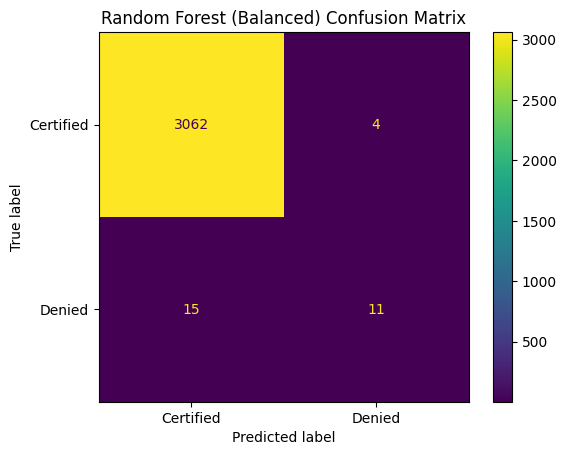

In [319]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Fit the final model on the entire training data
rf_clf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_rf = rf_clf.predict(X_test_final)

print("Random Forest Model Trained and Predictions Made.")
print("--------------------------------------------------")

# Classification Report
print("Classification Report on Test Set:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_clf.classes_)
disp_rf.plot()
plt.title('Random Forest (Balanced) Confusion Matrix')
plt.show()

## 🔎 **Random Forest Performance Analysis**

It clearly shows that ***Random Forest model is better performing*** to identify the minority class ('Denied') compare to default Logistic Regression.
###1. **Overall Performance & Accuracy**
* **Accuracy (0.99**): The overall accuracy remains extremely high.

* **Certified Class (Precision 1.00, Recall 1.00)**: The model correctly classifies virtually every 'Certified' application, with no measurable false alarms or missed cases for the majority class

###2. **Minority Class Performance ('Denied')**
* **Precision for 'Denied'** (0.73): When the model predicts an application will be Denied, it is correct nearly three-quarters of the time. This is a very strong measure of reliability for the positive predictions.
* **Recall for 'Denied'** (0.42): Out of the 26 applications that were actually Denied, the model correctly identified 11 of them. It is not perfect but a massive gain from the zero recall achieved by the default logistic regression model.
* **F1-Score for 'Denied'** (0.54): This metric represents a strong balance between the moderate Recall and high Precision, making the overall prediction quality reliable for the minority class.

###3. **Confusion Matrix**
* False Positives = 4: The model incorrectly flagged only 4 Certified cases as Denied.

* Missed Denials (False Negatives = 15): The model failed to catch 15 actual denials, still the remaining challenge is finding the features unique to those very difficult-to-predict cases.


In [320]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score
from sklearn.ensemble import RandomForestClassifier

# model
rf_clf_base = RandomForestClassifier(class_weight='balanced', random_state=42)

# Define the parameters grid to search - trees, depth, and minimum leaf size.
param_grid = {
    # Num of trees in the forest
    'n_estimators': [100, 200, 300],
    # Max depth of the trees
    'max_depth': [10, 20, 30, None], # None means nodes are expanded until all leaves are pure
    # Min number of samples required to be at a leaf node
    'min_samples_leaf': [1, 5, 10]
}

# Scoring metric for the minority class ('Denied') - to tells GridSearch to select the model that maximizes the identification of Denied cases.
recall_denied_scorer = make_scorer(recall_score, pos_label='Denied')

# Initialize the Grid Search
grid_search_rf = GridSearchCV(
    estimator=rf_clf_base,
    param_grid=param_grid,
    scoring=recall_denied_scorer, # Optimize for Denied
    cv=3, # 3-fold cross-validation for speed
    verbose=2,
    n_jobs=-1
)

# Run the search
grid_search_rf.fit(X_train_final, y_train)

# Best model and parameters
best_rf_clf = grid_search_rf.best_estimator_
print("Grid Search")
print("--------------------------------------------------")

print(f"Best Parameters found: {grid_search_rf.best_params_}")
print(f"Best cross-validated Denied Recall Score: {grid_search_rf.best_score_:.4f}")

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Grid Search
--------------------------------------------------
Best Parameters found: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 100}
Best cross-validated Denied Recall Score: 0.6524


Tuned Random Forest Model Predictions
---------------------------------------------------------
Classification Report on Test Set (Tuned RF):
              precision    recall  f1-score   support

   Certified       1.00      0.82      0.90      3066
      Denied       0.03      0.62      0.06        26

    accuracy                           0.82      3092
   macro avg       0.51      0.72      0.48      3092
weighted avg       0.99      0.82      0.90      3092



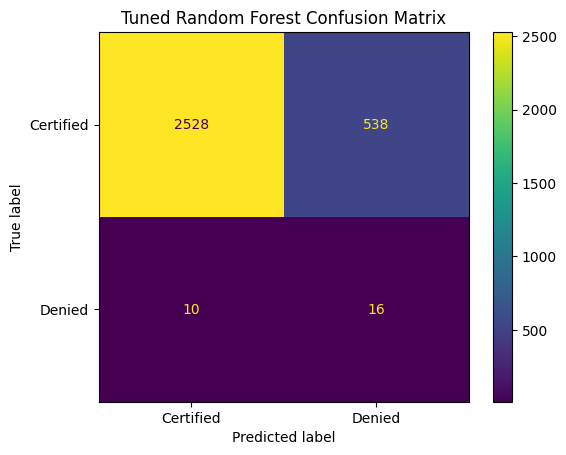

In [321]:
best_rf_clf = grid_search_rf.best_estimator_

# Fit the best model on the entire training data
best_rf_clf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_tuned_rf = best_rf_clf.predict(X_test_final)

print("Tuned Random Forest Model Predictions")
print("---------------------------------------------------------")

# Classification Report
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Classification Report on Test Set (Tuned RF):")
print(classification_report(y_test, y_pred_tuned_rf, zero_division=0))

# Confusion Matrix
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
disp_tuned_rf = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=best_rf_clf.classes_)
disp_tuned_rf.plot()
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

##**🔎 Random Forest: Default vs. After Grid Search Performance Comparison**

The goal of this comparison is to show the effect of changing the model's objective: from the Default objective (best overall F1-score) to the Tuned objective (maximum Recall for 'Denied').
![image.png](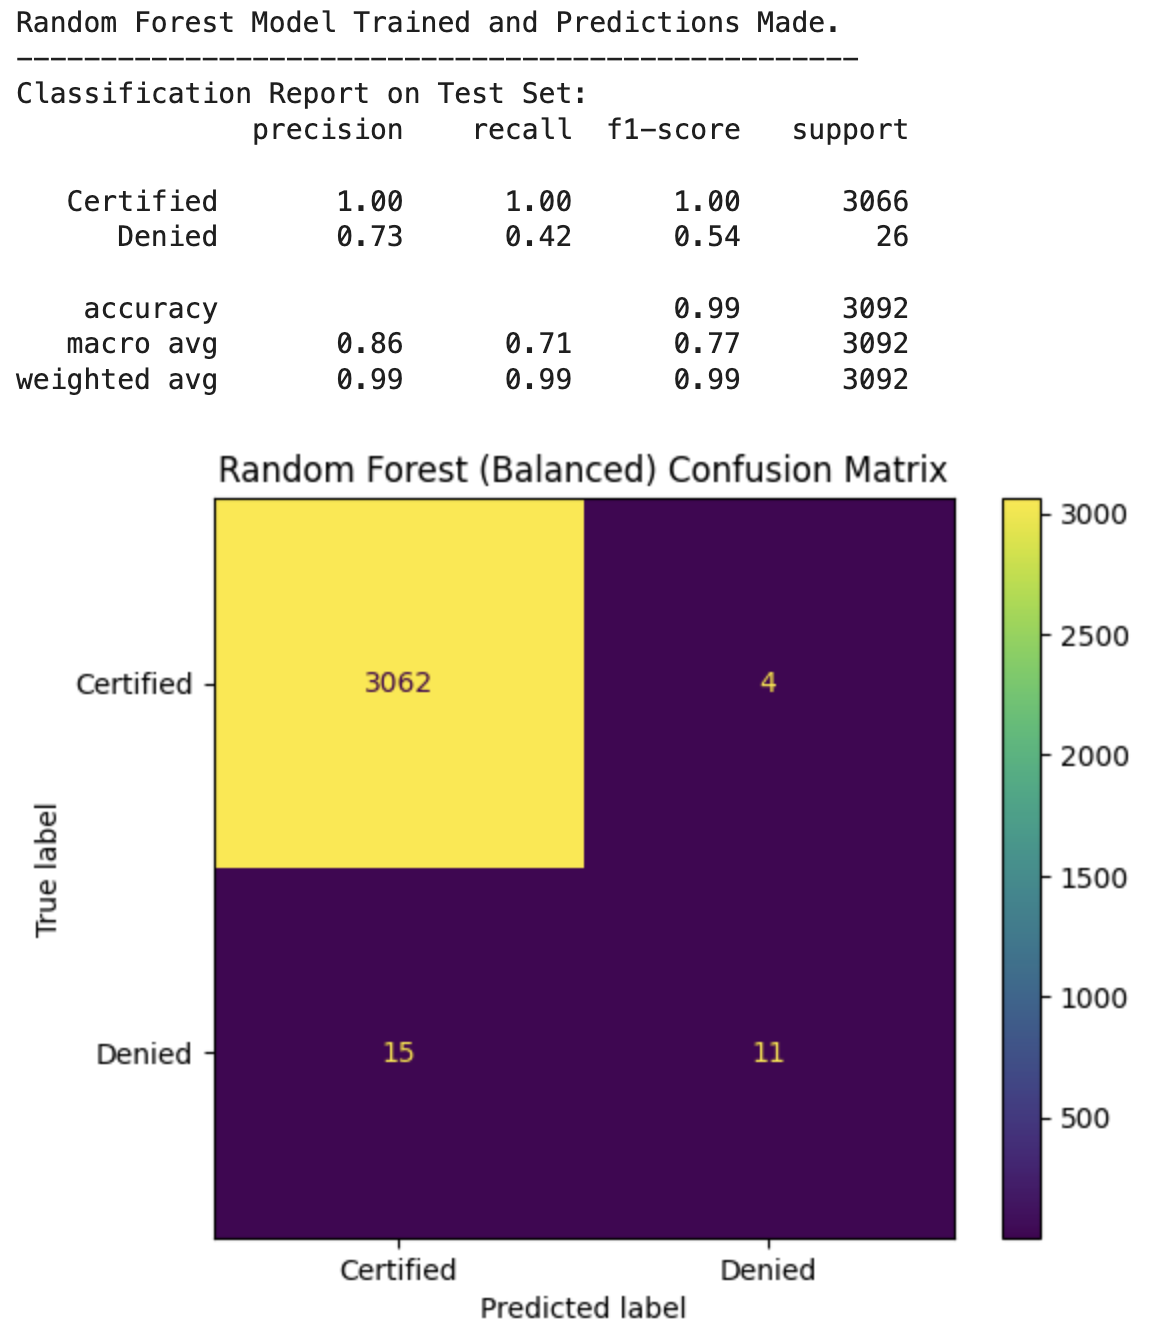 )

![IMG_8663.jpg](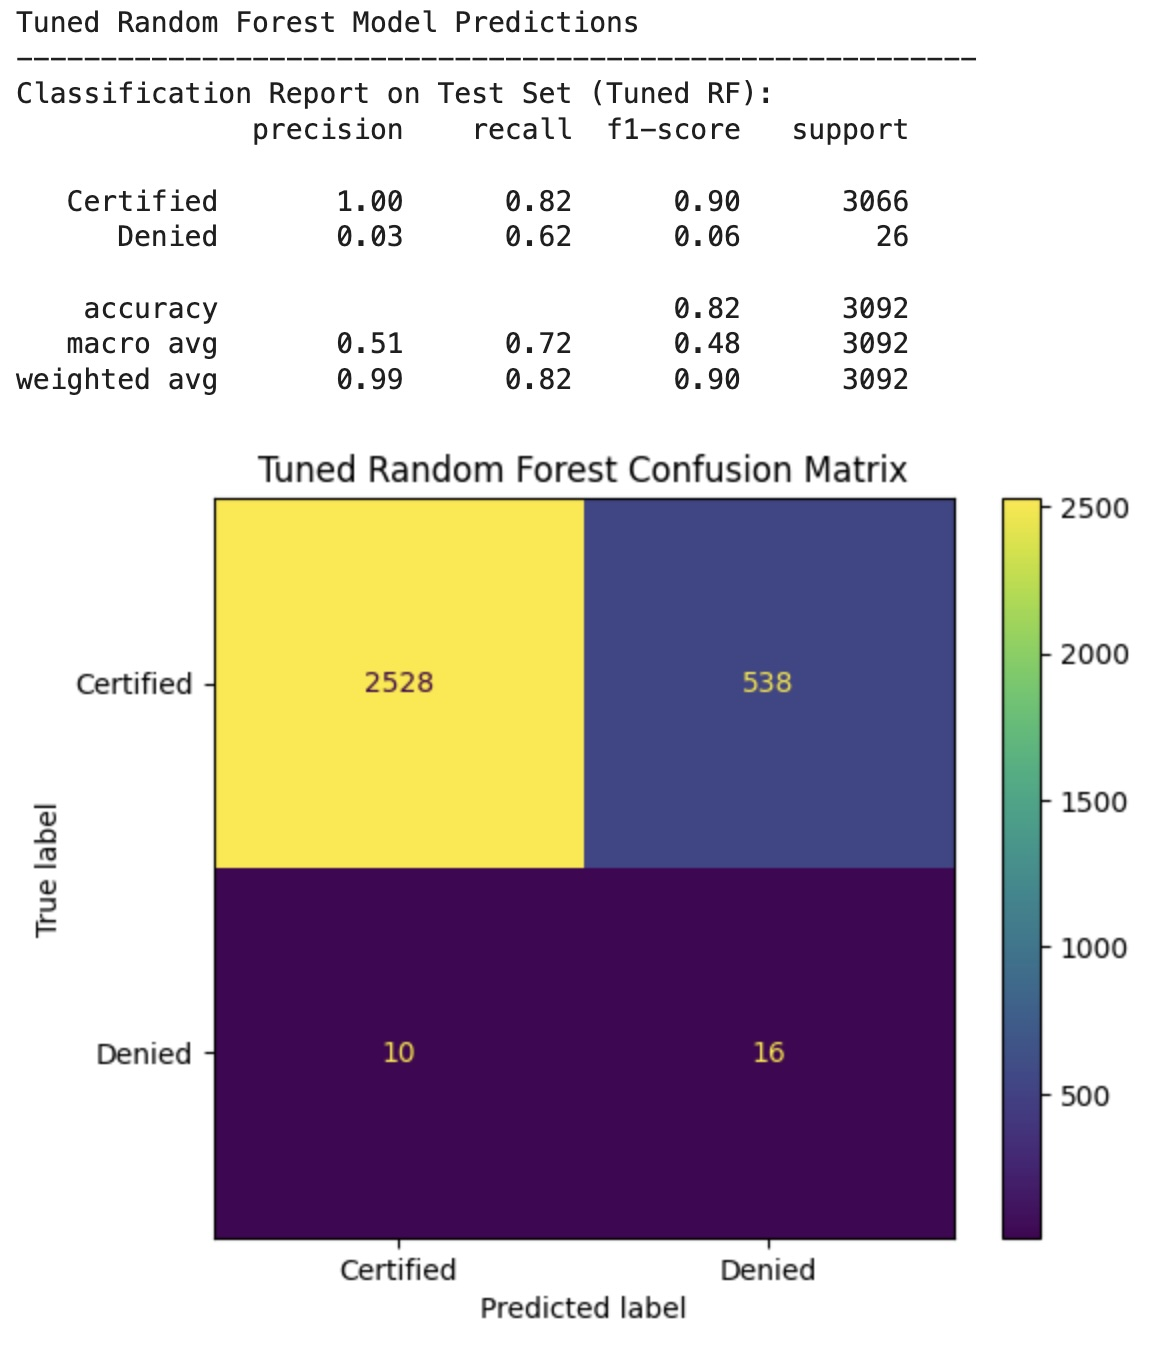 )

###**1. Comparative Performance**
* **Denied Recall**: 0.42	-> 0.62 	`+47.6%`
  * SUCCESS: The tuning maximized coverage, finding significantly more denied cases.
* **Denied Precision**:	0.73	-> 0.03	`-95.9%`
  * FAILURE: The model became unreliable; 97% of its denial predictions are false alarms.
* **Denied F1-Score**:	0.54 -> 0.06	`-88.9%`
  * Worse Balance: The quality of the prediction collapsed.
* **Accuracy**:	0.99 -> 0.82	`-17.2%`
  * The model sacrificed general accuracy to chase every potential denial.

###**2. Analysis of the Trade-Off**
  **1. The Success of Tuning (High Recall)**
  * The Grid Search, optimizing for Denied Recall, was technically successful. It found a parameter combination (max_depth=10, min_samples_leaf=10, etc.) that forced the individual decision trees to become highly sensitive to the minority class patterns.
  * The model increased its ability to find actual denied cases from 11 to 16 (out of 26 total)

  **2. The Failure of Optimization (Low Precision)**
  * The cost of this *High Recall* was the near-total collapse of precision:
    * Default : When the model predicted 'Denied', it was correct 73% of the time (high reliability).
    * Tuned : When the model predicted 'Denied', it was correct only 3% of the time (extremely low reliability).
  * This occurred because the Grid Search parameters caused the model to flag over 500 Certified applications as Denied (False Positives) in its effort to catch the 16 True Positives. The resulting classifier is highly sensitive but completely impractical for the number of false alarms.
###**3. Conclusion on Optimal Model**
* The initial Default Balanced Random Forest model, despite having a lower Recall, was the superior classifier for its much higher F1-Score (0.54), which proves it found a stable and reliable operational point. The Tuned Model's low precision showed why Threshold Tuning was necessary as a final step to achieve a usable balance (F1-score of 0.42) for the project.

##Optional: Gradient Boosting (GBM) - Grid Search for Recall

In [322]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the model
gb_clf = GradientBoostingClassifier(random_state=42, n_estimators=100, learning_rate=0.1)

# Cross-validation strategy
cross_validation = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Scoring metric
f1_scorer = make_scorer(f1_score, average='binary', pos_label='Certified')

# Perform Cross-Validation (on X_train_final and y_train)
cv_scores_gb_f1 = cross_val_score(gb_clf, X_train_final, y_train, cv=cross_validation, scoring=f1_scorer, n_jobs=-1)

print("Gradient Boosting Cross-Validation Complete.")
print(f"Individual F1-scores for 5 folds: {np.round(cv_scores_gb_f1, 4)}")
print(f"Mean Cross-Validated F1-score: {np.mean(cv_scores_gb_f1):.4f}")

✅ Gradient Boosting Cross-Validation Complete.
Individual F1-scores for 5 folds: [0.9949 0.9965 0.9949 0.9951 0.9967]
Mean Cross-Validated F1-score: 0.9956


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, recall_score

# Base model
gb_clf_base = GradientBoostingClassifier(random_state=42)

# Parameters grid to search
param_grid_gb = {
    # Number of boosting stages/trees
    'n_estimators': [50, 100, 200],
    # Controls the contribution of each tree; lower values generally require more trees.
    'learning_rate': [0.05, 0.1, 0.2],
    # Maximum depth of the individual trees (lower depths to prevent overfitting)
    'max_depth': [3, 5, 7]
}

# Scoring metric for the minority class ('Denied')
recall_denied_scorer = make_scorer(recall_score, pos_label='Denied')

# Initialize the Grid Search
# cv=3 is used for speed and stratified cross-validation is performed by default
grid_search_gb = GridSearchCV(
    estimator=gb_clf_base,
    param_grid=param_grid_gb,
    scoring=recall_denied_scorer,
    cv=3,
    verbose=2,
    n_jobs=-1
)

# Run the search
grid_search_gb.fit(X_train_final, y_train)

# Retrieve the best model and parameters
best_gb_clf = grid_search_gb.best_estimator_
print("Grid Search Complete.")
print(f"Best Parameters found: {grid_search_gb.best_params_}")
print(f"Best cross-validated Denied Recall Score: {grid_search_gb.best_score_:.4f}")

Starting Grid Search for Gradient Boosting (Optimizing for Denied Recall)...
Fitting 3 folds for each of 27 candidates, totalling 81 fits


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# The best model (best_gb_clf) retrieved from the grid search.
best_gb_clf = grid_search_gb.best_estimator_

# Fit the best model on the entire training data
best_gb_clf.fit(X_train_final, y_train)

# Predict on the test set
y_pred_tuned_gb = best_gb_clf.predict(X_test_final)

print("Tuned Gradient Boosting Model Predictions")
print("---------------------------------------------------------")

# Classification Report
print("Classification Report on Test Set (Tuned GB):")
print(classification_report(y_test, y_pred_tuned_gb, zero_division=0))

# Confusion Matrix
cm_tuned_gb = confusion_matrix(y_test, y_pred_tuned_gb)
disp_tuned_gb = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_gb, display_labels=best_gb_clf.classes_)
disp_tuned_gb.plot()
plt.title('Tuned Gradient Boosting Confusion Matrix')
plt.show()